###Contents

1. Business Problem
1. Data Understanding and EDA
1. Data Preprocessing
1. Modelling Process and Evaluation
1. Explain AI
1. Conclusion and Recomendation

##Business Problem Understanding

**Context**

Kepemilikan mobil adalah bagian penting dari kehidupan modern yang memberikan kemudahan mobilitas dan fleksibilitas dalam perjalanan sehari-hari. Namun, memiliki mobil juga membawa tanggung jawab, seperti pemeliharaan rutin, pembayaran pajak, dan pengelolaan risiko kerusakan atau kecelakaan. Biaya kepemilikan tidak hanya mencakup pembelian awal, tetapi juga pengeluaran berkelanjutan seperti bahan bakar, perawatan, dan asuransi.

Asuransi kendaraan menjadi salah satu pengeluaran wajib bagi pemilik mobil untuk mendapatkan perlindungan finansial dari risiko seperti kecelakaan, pencurian, atau kerusakan. Saat ini, perusahaan asuransi menawarkan berbagai produk yang beragam, baik dari segi jenis mobil yang dilindungi, cakupan perlindungan (coverage), maupun premi bulanan yang ditetapkan, sehingga pemilik kendaraan dapat memilih produk yang sesuai dengan kebutuhan dan anggarannya.

**Problem Statement**

Sebuah perusahaan asuransi di Amerika Serikat ingin mempertahankan profitabilitas dan merancang strategi bisnis jangka panjang yang efektif. Salah satu pendekatannya adalah memprediksi Customer Lifetime Value (CLV) setiap customer. Dengan informasi ini, perusahaan dapat menyusun strategi dalam meningkatkan retensi customer, mengoptimalkan biaya akuisisi customer, serta memproyeksikan pendapatan lebih akurat.

**Goals**

Tujuan dari model ini adalah untuk mengetahui nilai Customer Lifetime Value dari setiap customer (pemegang polis).

**Analytic Approach**

Proses awal yang akan dilakukan adalah Data Understanding dan Exploratory Data Analysis (EDA) pada dataset untuk memahami pola dan konteks yang ada.

Kemudian akan dilanjutkan dengan proses preprocessing data (Duplicate data, Missing Value, Outlier) sebelum pada akhirnya masuk pada proses pembuatan model Machine Learning Regresi yang dapat memprediksi nilai Customer Lifetime Value pada setiap customer.

**Metric Evaluation**

Metrik yang akan digunakan adalah:
1. MAE (Mean Absolute Error) : Rata-rata selisih clv-prediksi dan clv-actual (residu).
2. RMSE (Root Mean Squared Error) : Akar dari rata-rata kuadrat selisih clv-prediksi dan clv-actual.   
3. MAPE (Mean Absolute Percentage Error) : Rata-rata kesalahan prediksi terhadap nilai CLV aktual dalam bentuk persentase.

##Data Understanding and EDA

**Import Library and Dataset**

In [22]:
# Library : Basic
import numpy as np
import pandas as pd

# Library : Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Library : menghilangkan warnings
import warnings
warnings.filterwarnings('ignore')

In [23]:
# Import Dataset : Customer Lifetime Value
clv = pd.read_csv('/content/data_customer_lifetime_value.csv')

# Overview Dataset
clv.head(3)

,Vehicle Class,Coverage,Renew Offer Type,EmploymentStatus,Marital Status,Education,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value
0,Four-Door Car,Extended,Offer1,Retired,Divorced,High School or Below,2.0,90.0,571.479602,11828.0,10083.486880
1,Four-Door Car,Basic,Offer1,Employed,Married,College,6.0,62.0,114.514440,44762.0,4943.386117
2,Two-Door Car,Basic,Offer1,Retired,Married,Master,2.0,62.0,257.248789,21514.0,11981.984810


###Exploratory Data Analysis (EDA)

In [24]:
# Raw dataset - Summary
clv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5669 entries, 0 to 5668
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Vehicle Class            5669 non-null   object 
 1   Coverage                 5669 non-null   object 
 2   Renew Offer Type         5669 non-null   object 
 3   EmploymentStatus         5669 non-null   object 
 4   Marital Status           5669 non-null   object 
 5   Education                5669 non-null   object 
 6   Number of Policies       5669 non-null   float64
 7   Monthly Premium Auto     5669 non-null   float64
 8   Total Claim Amount       5669 non-null   float64
 9   Income                   5669 non-null   float64
 10  Customer Lifetime Value  5669 non-null   float64
dtypes: float64(5), object(6)
memory usage: 487.3+ KB


In [25]:
# Descriptive Statistics - Data Numerikal
clv.describe()

,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value
count,5669.000000,5669.000000,5669.000000,5669.000000,5669.000000
mean,2.979361,93.026989,431.407103,37868.188569,8029.874592
std,2.393187,34.551795,287.558038,30490.490723,6916.708246
min,1.000000,61.000000,0.423310,0.000000,1898.007675
25%,1.000000,68.000000,266.932542,0.000000,3954.344534
50%,2.000000,82.000000,379.200000,34322.000000,5800.188903
75%,4.000000,109.000000,549.986128,62464.000000,9031.214859
max,9.000000,297.000000,2759.794354,99934.000000,83325.381190


Tabel diatas menunjukkan nilai `mean` dari semua kolom numerikal (include Customer Lifetime Value) bernilai lebih besar dari nilai `mediannya`.
Hal itu menunjukkan bahwa data terdistribusi secara right-skewed pada seluruh kolom numerikal tsb.

In [26]:
# Descriptive Statistics - Data Kategorikal
clv.describe(include='object')

,Vehicle Class,Coverage,Renew Offer Type,EmploymentStatus,Marital Status,Education
count,5669,5669,5669,5669,5669,5669
unique,6,3,4,5,3,5
top,Four-Door Car,Basic,Offer1,Employed,Married,Bachelor
freq,2858,3477,2292,3541,3305,1703


In [27]:
# Cek Data Unique setiap kolom
lihat_unique = []

for i in clv.columns :
    lihat_unique.append( [i, clv[i].nunique(), clv[i].unique(), clv[i].dtype])

tabel_lihat = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample','Dtype'],
                     data=lihat_unique)
tabel_lihat

,Column Name,Number of Unique,Unique Sample,Dtype
0,Vehicle Class,6,"[Four-Door Car, Two-Door Car, SUV, Sports Car,...",object
1,Coverage,3,"[Extended, Basic, Premium]",object
2,Renew Offer Type,4,"[Offer1, Offer3, Offer2, Offer4]",object
3,EmploymentStatus,5,"[Retired, Employed, Disabled, Medical Leave, U...",object
4,Marital Status,3,"[Divorced, Married, Single]",object
5,Education,5,"[High School or Below, College, Master, Bachel...",object
6,Number of Policies,9,"[2.0, 6.0, 1.0, 8.0, 5.0, 3.0, 7.0, 4.0, 9.0]",float64
7,Monthly Premium Auto,191,"[90.0, 62.0, 116.0, 107.0, 101.0, 66.0, 65.0, ...",float64
8,Total Claim Amount,3274,"[571.479602, 114.51444, 257.248789, 556.8, 355...",float64
9,Income,3625,"[11828.0, 44762.0, 21514.0, 17913.0, 19030.0, ...",float64


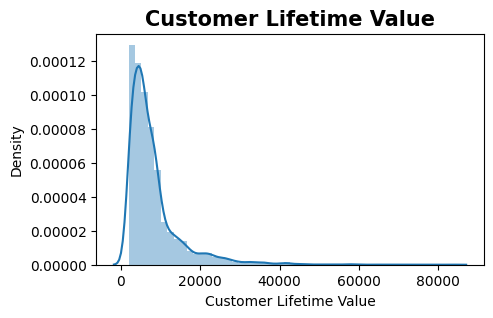

In [28]:
# Customer Lifetime Value - Overview
plt.figure(figsize=(5, 3))
sns.distplot(clv['Customer Lifetime Value'])
plt.title('Customer Lifetime Value', size=15, weight='bold');

Nilai CLV pada dataset menunjukkan terdistribusi right-skewed ekstrim.

##Data Preprocessing

###Duplicate Data

In [29]:
# Check jumlah data yang duplikat otentik
clv.duplicated().sum()

618

In [30]:
# Hapus data duplikat otentik
clv.drop_duplicates(inplace=True)

# Pengecekan jumlah terbaru
row, column = clv.shape
print("Jumlah baris yang tersisa setelah dibersihkan dari data duplicated yaitu", row,"baris")

Jumlah baris yang tersisa setelah dibersihkan dari data duplicated yaitu 5051 baris


Terdapat 618 data duplikat (10,9%) dari total 5669 data. Hal ini diasumsikan terjadi akibat penginputan data yang sama secara berulang. Jika data duplikat tersebut dibiarkan, dikhawatirkan akan mempengaruhi kinerja model dan menyebabkan overfitting. Oleh karena itu, langkah yang tepat adalah menghapus data duplikat tersebut.

###Missing Value

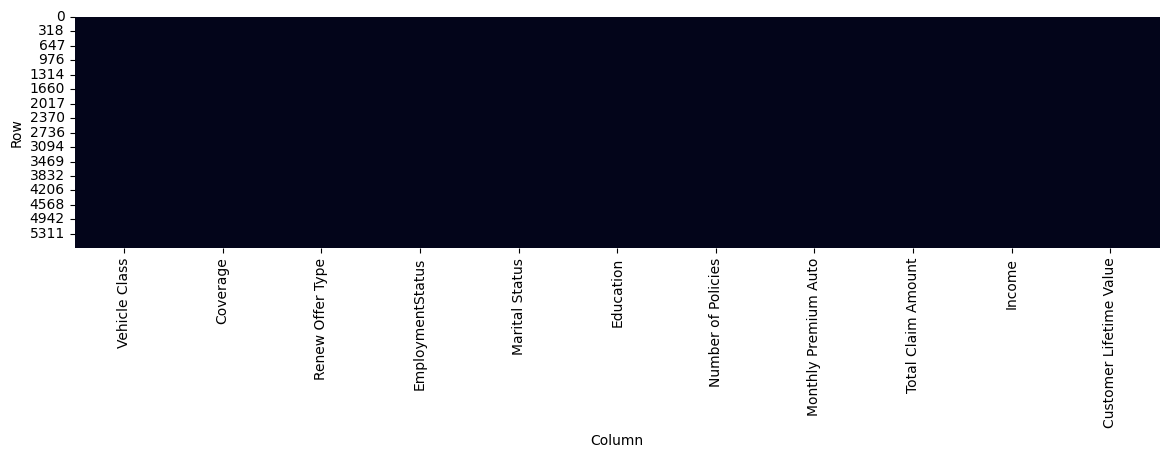

In [31]:
# Missing Value Check setiap column
plt.figure(figsize=(14,3))
sns.heatmap(clv.isna(), cbar=False)
plt.xlabel('Column')  #sb.x
plt.ylabel('Row')  #sb.y
plt.show()

Hasil pengujian visualisasi heatmap menunjukkan tidak terdapat missing value di semua kolom dataset sehingga tidak ada proses drop/pengurangan data.

###Outlier

In [32]:
# Histogram - Customer Lifetime Value
px.histogram(
    clv,
    x=[clv[clv['Customer Lifetime Value'] > 16600]['Customer Lifetime Value']],
    nbins=100
)

In [33]:
# Boxplot
px.box(clv, x='Customer Lifetime Value', title='CLV', width=1000, height=250)

Upper Limit dari nilai CLV adalah 16.589 USD (pembulatan menjadi 16.600 USD)

In [34]:
# Histogram - CLV > 16600 USD
px.histogram(
    clv,
    x=[clv[clv['Customer Lifetime Value'] > 16600]['Customer Lifetime Value']],
    nbins=50,
)

In [35]:
# Jumlah data dengan clv > 28000 USD
row, column = clv[clv['Customer Lifetime Value'] > 28000].shape
print("Jumlah data dengan nilai CLV diatas 28000", row,"row data")

Jumlah data dengan nilai CLV diatas 28000 119 row data


In [36]:
#Hapus data Outlier Ekstrem CLV > 28000 USD
clv = clv[clv['Customer Lifetime Value'] <= 28000]

# Pengecekan jumlah terbaru
row, column = clv.shape
print("Jumlah data yang tersisa setelah dibersihkan dari outlier yaitu", row,"row data")

Jumlah data yang tersisa setelah dibersihkan dari outlier yaitu 4932 row data


###Clean Data

Clean Data adalah data yang telah melalui rangkaian proses preprocessing data (Duplicate data, missing value, outlier).

Overview dari rangkaian proses ini sebagai berikut:
1. Raw Data berjumlah: 5669 row data
2. Total temuan berjumlah 737, dengan rincian sebagai berikut:
  - Duplicated data = 618 row data
  - Missing Value = 0
  - Outlier = 119 row data
3. Data temuan akan di-drop/dibersihkan sehingga jumlah data bersih (`clean data`) yang akan diolah ke proses berikutnya berjumlah `4932 (87% dari raw data)`.

In [37]:
# Overview clean data
clv.sample(5)

,Vehicle Class,Coverage,Renew Offer Type,EmploymentStatus,Marital Status,Education,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value
3711,Four-Door Car,Basic,Offer1,Medical Leave,Married,Doctor,3.0,66.0,214.866605,12608.0,4991.471970
1834,Four-Door Car,Basic,Offer1,Employed,Divorced,High School or Below,2.0,65.0,183.293091,76590.0,7887.964945
824,Four-Door Car,Basic,Offer1,Employed,Married,High School or Below,1.0,68.0,326.400000,53021.0,2599.041580
3991,Four-Door Car,Extended,Offer1,Employed,Married,College,2.0,93.0,479.934846,22926.0,11003.016450
755,Four-Door Car,Basic,Offer2,Unemployed,Married,Bachelor,1.0,66.0,433.160284,0.0,2396.219292


#Modeling Process and Evaluation

**Import Library**

In [38]:
# Library : Split
from sklearn.model_selection import train_test_split

# Library : Modular
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Library : Feature Engineering
import category_encoders as ce                      #Binary dan Ordinal Encoding
from sklearn.preprocessing import OneHotEncoder     #One Hot Encoding
from sklearn.preprocessing import StandardScaler    #Standar Scalling

# Library : Berbagai model regresi
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.compose import TransformedTargetRegressor

# Library : Evaluasi Model
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from sklearn.model_selection import cross_val_score, RandomizedSearchCV, GridSearchCV, KFold

##Encoding and Scalling

Dataset CLV memiliki 6 kolom kategorikal yang perlu di-encode agar dapat digunakan dalam model machine learning.

Jenis encoding yang dipilih pada setiap kolom kategorikal sebagai berikut:


| **No**  | **Column Name**   | **Unique Value**                                                       | **Type Data** | **n-unique** | **Type Encoding** |
| ------- | ----------------- | ---------------------------------------------------------------------- | ------------------- | ------------ | ----------------- |
| 1|Vehicle Class|Four-Door Car, Two-Door Car, SUV, Sports Car, Luxury SUV, Luxury Car|Nominal| 6| One-hot Encoding|
|2| Coverage| Extended, Basic, Premium                                              | Ordinal|3| Ordinal Encoding|
|3| Renew Offer Type| Offer1, Offer3, Offer2, Offer4                                         | Nominal| 4| One-hot Encoding|
| 4| EmploymentStatus   | Retired, Employed, Disabled, Medical Leave, Unemployed                 | Nominal             | 5            | One-hot Encoding|
| 5| Marital Status     | Divorced, Married, Single                                              | Nominal| 3            | One-hot Encoding|
| 6| Education          | High School or Below, College, Master, Bachelor, Doctor                | Ordinal             | 5| Ordinal Encoding|

Keterangan:
1. Kategorikal-Ordinal : Jenis ini mempunyai urutan data unique yang jelas secara hierarki, sehingga menggunakan type `Ordinal Encoding`.
2. Kategorikal-Nominal : Agar mempermudah saat interpretasi model menggunakan SHAP nanti, type encoding yang akan digunakan pada type ini adalah `One-hot Encoding`.

In [39]:
# Ordinal Enc : List Kolom
ordinal_var = ['Coverage','Education']

# Ordinal Enc : Mapping
ordinal_mapping = [
    {'col':'Coverage',
     'mapping':{'Basic':0, 'Extended':1, 'Premium':2}},
    {'col':'Education',
     'mapping':{'High School or Below':0,'College':1, 'Master':2,'Bachelor':3, 'Doctor':4}}
]

# Ordinal Enc
ordinal_encoder = ce.OrdinalEncoder(cols= ordinal_var, mapping= ordinal_mapping)

In [40]:
# One-hot Enc : List Kolom
onehot_var = ['Vehicle Class','Renew Offer Type','EmploymentStatus','Marital Status']

# One-hot Enc
onehot_encoder = OneHotEncoder(drop='first')

In [41]:
# Transformer
transformer = ColumnTransformer([
    ('Ordinal', ordinal_encoder, ordinal_var),
    ('Onehot', onehot_encoder, onehot_var)],
    remainder='passthrough')

Variabel independen (fitur) memiliki skala yang berbeda-beda, dan beberapa kandidat model yang akan kita gunakan nantinya juga sensitif terhadap skala data. Oleh karena itu, metode yang akan kita gunakan untuk scaling adalah StandardScaler.

In [42]:
# Scaling data
scaler = StandardScaler()

##**Data Splitting**

Variabel dependend (`target`) pada model ML yang akan kita bangun adalah kolom `Customer Lifetime Value`, sedangkan variabel independent (`feature`) nya adalah semua kolom `selain` 'Customer Lifetime Value'.

Dataset akan dibagi menjadi 2 bagian yaitu, Data Train dan Data Test dengan proporsi 80:20 dan random_state=1. Data Train akan digunakan program sebagai bahan dalam membuat model, sedangkan Data Test akan digunakan program saat proses evaluasi model.

In [43]:
# Define Target (y) dan Feature (X)
X = clv.drop(['Customer Lifetime Value'], axis=1)
y = clv['Customer Lifetime Value']

In [44]:
# Split data : Train (80%) dan Test (20%) dengan random_state=1
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=1)

##Define Algorithms and Metrics Evaluation

**Define Kandidat Algoritma**

In [45]:
# Define kandidat algoritma model regresi
lr = LinearRegression()
knn = KNeighborsRegressor()
dt = DecisionTreeRegressor(random_state=1)
rf = RandomForestRegressor(random_state=1)
xgb = XGBRegressor(random_state=1)

# Pemodelan akan dilakukan dalam skala logaritmik, kemudian di-inverse kembali
log_lr = TransformedTargetRegressor(lr, func=np.log, inverse_func=np.exp)
log_knn = TransformedTargetRegressor(knn, func=np.log, inverse_func=np.exp)
log_dt = TransformedTargetRegressor(dt, func=np.log, inverse_func=np.exp)
log_rf = TransformedTargetRegressor(rf, func=np.log, inverse_func=np.exp)
log_xgb = TransformedTargetRegressor(xgb, func=np.log, inverse_func=np.exp)

# Semua Algoritma
models = [log_lr, log_knn, log_dt, log_rf, log_xgb]

**Define Metric Evaluasi Model**

In [46]:
# Metric : Mean Absolute Error (MEA)
score_mae = []
nilai_mean_mae = []
nilai_std_mae = []

# Metric : Root Mean Squared Error (RMSE)
score_rmse = []
nilai_mean_rmse = []
nilai_std_rmse = []

# Metric : Mean Absolute Percentage Error (MAPE)
score_mape = []
nilai_mean_mape = []
nilai_std_mape = []

Terdapat 3 metrik yang akan digunakan sebagai evaluasi model, yaitu:
1. MAE (Mean Absolute Error) : Rata-rata selisih clv-prediksi dan clv-actual (residu).
2. RMSE (Root Mean Squared Error) : Akar dari rata-rata kuadrat selisih clv-prediksi dan clv-actual.   
3. MAPE (Mean Absolute Percentage Error) : Rata-rata kesalahan prediksi terhadap nilai CLV aktual dalam bentuk persentase.

##Base Model Fitting and Evaluation

Karena data yang akan diprediksi bersifat kontinu (numerikal) yang tidak mempermasalahkan proporsi data, maka metode cross validation yang akan digunakan adalah `Kfold Cross Validation`.

In [47]:
# Cross Validation kandidat algoritma
for i in models:

    crossval = KFold(n_splits=5, shuffle=True, random_state=1)

    estimator = Pipeline([                  #Pipeline
        ('preprocessing', transformer),     #Langkah 1: Preprocessing
        ('scaler', scaler),                 #Langkah 2: Scaling
        ('model', i)                        #Langkah 3: Model
    ])

    # RMSE
    model_cv_rmse = cross_val_score(
        estimator,
        X_train,
        y_train,
        cv=crossval,
        scoring='neg_root_mean_squared_error',
        error_score='raise'
        )

    print(model_cv_rmse, i)

    score_rmse.append(model_cv_rmse)
    nilai_mean_rmse.append(model_cv_rmse.mean())
    nilai_std_rmse.append(model_cv_rmse.std())

    # MAE
    model_cv_mae = cross_val_score(
        estimator,
        X_train,
        y_train,
        cv=crossval,
        scoring='neg_mean_absolute_error',
        error_score='raise'
        )

    print(model_cv_mae, i)

    score_mae.append(model_cv_mae)
    nilai_mean_mae.append(model_cv_mae.mean())
    nilai_std_mae.append(model_cv_mae.std())

    # MAPE
    model_cv_mape = cross_val_score(
        estimator,
        X_train,
        y_train,
        cv=crossval,
        scoring='neg_mean_absolute_percentage_error',
        error_score='raise'
        )

    print(model_cv_mape, i)

    score_mape.append(model_cv_mape)
    nilai_mean_mape.append(model_cv_mape.mean())
    nilai_std_mape.append(model_cv_mape.std())

[-4139.94407665 -4932.91256656 -4710.99973301 -4922.6603057
 -4880.69292689] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-2625.82327317 -3023.56556952 -2825.51093084 -3010.77933193
 -2939.66871719] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-0.40139915 -0.38639249 -0.38840102 -0.38656884 -0.38919262] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-4409.29978148 -5012.3998675  -4732.35736105 -4929.49736099
 -4966.61550985] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=KNeighborsRegressor())
[-2773.67656503 -3052.60535117 -2864.77516077 -3001.19899277
 -2985.09375357] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                     

In [48]:
# Evaluasi performa kandidat model
pd.DataFrame({
    'Model': ['Linear Regression', 'KNN', 'DecisionTree', 'RandomForest', 'XGBoost'],
    'Mean_MAE': nilai_mean_mae,       #MAE
    'Std_MAE': nilai_std_mae,
    'Mean_RMSE': nilai_mean_rmse,     #RMSE
    'Std_RMSE': nilai_std_rmse,
    'Mean_MAPE': nilai_mean_mape,     #MAPE
    'Std_MAPE': nilai_std_mape
})

,Model,Mean_MAE,Std_MAE,Mean_RMSE,Std_RMSE,Mean_MAPE,Std_MAPE
0,Linear Regression,-2885.069565,147.459165,-4717.441922,299.579151,-0.390391,0.005607
1,KNN,-2935.469965,101.664530,-4810.033976,221.974225,-0.418201,0.010702
2,DecisionTree,-1223.775461,112.590149,-3409.778382,233.632867,-0.111985,0.009746
3,RandomForest,-1006.807020,87.618693,-2553.681474,173.729146,-0.084961,0.005484
4,XGBoost,-1111.868584,85.655843,-2662.182726,180.897486,-0.103158,0.004843


Berdasarkan evaluasi metrik pada data train-set, `model Random Forest dan XGBoost` menunjukkan hasil yang lebih baik dibandingkan dengan tiga model lainnya. Kedua model terbaik ini akan diteruskan untuk evaluasi lebih lanjut menggunakan data train-set.

In [49]:
# Benchmark 2 model terbaik pada Train Set
models = {
    'RandomForest': RandomForestRegressor(random_state=1),
    'XGB': XGBRegressor(random_state=1)
}

score_mae = []
score_rmse = []
score_mape = []

# Prediksi pada Test set
for i in models:

    model = Pipeline([
        ('preprocessing', transformer),
        ('scaler', scaler),
        ('model', models[i])
        ])

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score_mae.append(mean_absolute_error(y_test, y_pred))
    score_rmse.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    score_mape.append(mean_absolute_percentage_error(y_test, y_pred))

score_before_tuning = pd.DataFrame({'MAE': score_mae, 'RMSE': score_rmse, 'MAPE': score_mape}, index=models.keys())
score_before_tuning

,MAE,RMSE,MAPE
RandomForest,1164.124263,2703.301768,0.099010
XGB,1466.900115,2857.339637,0.174484


Berdasarkan semua metrik evaluasi, terlihat model `Random Forest lebih unggul` dibandingkan model XGBoost.

##Hyperparameter Tuning

**Define Hyperparameter for Random Forest**

In [50]:
# HP : Jumlah pohon decision tree
n_estimators = list(np.arange(100, 300))

# HP : Min sampel untuk split Internal Node
min_samples_split = list(np.arange(2, 6))

# HP : Min sampel untuk membentuk leaf node
min_samples_leaf = list(np.arange(1, 5))

# HP : Max baris data yang digunakan setiap pohon (% dari total baris train set)
max_samples = list(np.arange(0.8, 1.0, 0.1))

# HP : Max fitur pada setiap pohon
max_features = list(np.arange(0.8, 1.0, 0.1))

# HP : Max Kedalaman pohon
max_depth = list(np.arange(20, 200))


# Hyperparameter space RandomForest
hyperparam_space_rf = {
    'model__max_depth': max_depth,
    'model__n_estimators': n_estimators,
    'model__max_samples': max_samples,
    'model__min_samples_split': min_samples_split,
    'model__min_samples_leaf': min_samples_leaf,
    'model__max_features': max_features
}

**Define Hyperparameter Tuning**

Proses pencarian kombinasi hyperparameter terbaik akan menggunakan metode RandomizedSearchCV supaya lebih efesien.

In [51]:
# Model dengan hyperparameter tuning
rf = RandomForestRegressor(random_state=1)

# Membuat algorithm chains
estimator_rf = Pipeline([
    ('preprocessing', transformer),
    ('scaler', scaler),
    ('model', rf)
])

# Cross-validation dengan 5 split
crossval = KFold(n_splits=5, shuffle=True, random_state=1)

# Hyperparameter tuning
random_rf = RandomizedSearchCV(
    estimator_rf,
    param_distributions=hyperparam_space_rf,
    n_iter=50,                  # Jumlah iterasi dalam random search
    cv=crossval,
    scoring=['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error'],
    n_jobs=-1,
    refit='neg_root_mean_squared_error',  #Metric yg jadi acuan optimasi
    random_state=1
)

**Hyperparameter Tuning Process**

In [52]:
# Fitting RandomizedSearchCV dengan data
random_rf.fit(X_train, y_train)

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=1, shuffle=True),
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('Ordinal',
                                                                               OrdinalEncoder(cols=['Coverage',
                                                                                                    'Education'],
                                                                                              mapping=[{'col': 'Coverage',
                                                                                                        'data_type': dtype('O'),
                                                                                                        'mapping': Basic       0
Extended    1
Premium     2
dtype: int64},
                                                                                                       {'col': 'Education',
                                                                                                        'data_type':...
                                        'model__min_samples_leaf': [1, 2, 3, 4],
                                        'model__min_samples_split': [2, 3, 4,
                                                                     5],
                                        'model__n_estimators': [100, 101, 102,
                                                                103, 104, 105,
                                                                106, 107, 108,
                                                                109, 110, 111,
                                                                112, 113, 114,
                                                                115, 116, 117,
                                                                118, 119, 120,
                                                                121, 122, 123,
                                                                124, 125, 126,
                                                                127, 128, 129, ...]},
                   random_state=1, refit='neg_root_mean_squared_error',
                   scoring=['neg_root_mean_squared_error',
                            'neg_mean_absolute_error',
                            'neg_mean_absolute_percentage_error'])

In [53]:
# Melihat hasil tuning dalam bentuk dataframe. Diurutkan berdasarkan RMSE, MAE & MAPE
pd.DataFrame(random_rf.cv_results_).sort_values(by=['rank_test_neg_root_mean_squared_error', 'rank_test_neg_mean_absolute_error', 'rank_test_neg_mean_absolute_percentage_error']).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__n_estimators,param_model__min_samples_split,param_model__min_samples_leaf,param_model__max_samples,param_model__max_features,param_model__max_depth,...,std_test_neg_mean_absolute_error,rank_test_neg_mean_absolute_error,split0_test_neg_mean_absolute_percentage_error,split1_test_neg_mean_absolute_percentage_error,split2_test_neg_mean_absolute_percentage_error,split3_test_neg_mean_absolute_percentage_error,split4_test_neg_mean_absolute_percentage_error,mean_test_neg_mean_absolute_percentage_error,std_test_neg_mean_absolute_percentage_error,rank_test_neg_mean_absolute_percentage_error
4,3.807539,0.743243,0.068378,0.006918,249,4,4,0.8,0.9,25,...,85.390540,11,-0.087310,-0.098406,-0.085119,-0.100115,-0.090678,-0.092326,0.005957,2
15,2.845107,0.211030,0.057466,0.000826,217,3,4,0.8,0.9,34,...,86.320194,18,-0.087142,-0.098524,-0.085189,-0.100496,-0.090912,-0.092453,0.006081,10
11,4.740873,0.987284,0.085923,0.014605,287,4,3,0.8,0.9,137,...,85.814264,19,-0.087243,-0.098493,-0.085397,-0.100151,-0.091261,-0.092509,0.005900,13
34,1.889219,0.471152,0.055671,0.021358,119,4,4,0.8,0.9,115,...,84.595175,29,-0.087694,-0.098551,-0.085221,-0.100578,-0.091223,-0.092653,0.005991,25
44,3.341424,0.736649,0.079023,0.016714,227,4,4,0.8,0.8,77,...,86.724752,34,-0.087443,-0.099149,-0.085741,-0.100209,-0.090818,-0.092672,0.005959,27


In [54]:
# Cek skor dan params terbaik
print('Random Forest')
print('Best_score:', random_rf.best_score_)
print('Best_params:', random_rf.best_params_)

Random Forest
Best_score: -2499.2717375844913
Best_params: {'model__n_estimators': 249, 'model__min_samples_split': 4, 'model__min_samples_leaf': 4, 'model__max_samples': 0.8, 'model__max_features': 0.9, 'model__max_depth': 25}


Berdasarkan hasil hyperparameter tuning pada model random forest, didapatkan model yang terbaik yaitu sebagai berikut

**Predict Test Set with the Tuned Model**

In [55]:
# Model Random Forest
model = {'RandomForest': RandomForestRegressor(random_state=1)}

# Define model terhadap estimator terbaik
rf_tuning = random_rf.best_estimator_

# Fitting model
rf_tuning.fit(X_train, y_train)

# Predict test set
y_pred_rf_tuning = rf_tuning.predict(X_test)

# Simpan nilai metrics RMSE, MAE & MAPE setelah tuning
rmse_rf_tuning = np.sqrt(mean_squared_error(y_test, y_pred_rf_tuning))
mae_rf_tuning = mean_absolute_error(y_test, y_pred_rf_tuning)
mape_rf_tuning = mean_absolute_percentage_error(y_test, y_pred_rf_tuning)

# Score Evaluation Metric
score_after_tuning = pd.DataFrame({'MAE': mae_rf_tuning, 'RMSE': rmse_rf_tuning, 'MAPE': mape_rf_tuning}, index=model.keys())
score_after_tuning

,MAE,RMSE,MAPE
RandomForest,1157.095883,2665.444685,0.097012


**Compare - Before vs After Tuned with Hyperparameter**

In [56]:
# Sebelum hyperparameter tuning
pd.DataFrame(score_before_tuning.loc['RandomForest']).T

,MAE,RMSE,MAPE
RandomForest,1164.124263,2703.301768,0.09901


In [57]:
# Setelah hyperparameter tuning
score_after_tuning

,MAE,RMSE,MAPE
RandomForest,1157.095883,2665.444685,0.097012


Setelah proses hyperparameter tuning dilakukan pada model random forest regresi, terdapat peningkatan kinerja model* sebagai berikut:
1. MAE : 1157 USD, turun sebesar 0.6% dari sebelum di tuning
2. RMSE : 2665 USD, turun sebesar 1.4% dari sebelum di tuning
3. MAPE : 9,7 %, turun sebesar 2.02% dari sebelum di tuning

Interpretasi dari metrik tersebut yaitu:
1. Dengan rata-rata kesalahan sebesar 1157 USD, model memiliki tingkat akurasi yang cukup baik dalam memprediksi CLV, di mana selisih antara prediksi dan nilai sebenarnya relatif kecil. Artinya, secara rata-rata, prediksi CLV untuk setiap pelanggan hanya meleset sekitar 1157 USD dari nilai aktual.
2. Nilai RMSE sebesar 2665 USD menunjukkan bahwa kesalahan prediksi cenderung lebih besar untuk beberapa pelanggan tertentu, karena RMSE lebih sensitif terhadap outlier dibandingkan MAE. Namun, nilai ini masih dalam batas wajar untuk memodelkan CLV pelanggan.
3. Dengan rata-rata kesalahan sebesar 9,7%, model mampu memberikan prediksi CLV yang cukup akurat dalam persentase relatif terhadap nilai aktual. Ini berarti prediksi model memiliki tingkat akurasi tinggi, dengan kesalahan kurang dari 10% dibandingkan nilai aktual untuk sebagian besar pelanggan.

**Compare - Actual vs Prediction CLV with Tuned Model**

In [58]:
#Scatter Plot
fig = px.scatter(x=y_test, y=y_pred_rf_tuning,
                 labels={'x': 'Actual CLV', 'y': 'Predicted CLV'},
                 title='Actual vs Prediction CLV')

fig.show()

**Analisis Scatter Plot: Actual CLV vs Predicted CLV**

1. `Range 2000–11,500 USD`:
  >Hubungan antara nilai actual CLV dan predicted CLV membentuk tren garis diagonal lurus yang solid. Hal ini menunjukkan model regresi cukup akurat dan andal dalam memprediksi nilai CLV pada rentang ini.

2. `Range 11,500–26,000 USD`:
  >Titik-titik cenderung menjauh dari garis diagonal lurus dan mendekati sumbu-x (actual CLV). Predicted CLV sering kali lebih besar dibandingkan nilai aktualnya. Ini menunjukkan model kurang dapat dipercaya untuk memprediksi pada rentang ini.

3. `Penyebab Utama`:
  >Distribusi CLV pada train-set sangat right-skewed (Imbalance Data), dengan sedikit data pada nilai CLV tinggi. Hal ini menyebabkan model kesulitan belajar dan memprediksi secara akurat untuk nilai CLV besar.

4. `Rekomendasi Upgrade Model`:
  >Model telah memberikan prediksi yang cukup baik dengan hasil evaluasi metrik: MAE (1,157 USD), RMSE (2,665 USD), dan MAPE (9,7%) secara keseluruhan. Namun, untuk meningkatkan akurasi pada nilai CLV besar (11,500–26,000 USD atau lebih), berikut rekomendasi peningkatan:
  - Penambahan Data: Tambahkan data dengan nilai CLV pada rentang tersebut untuk meningkatkan kemampuan model dalam mempelajari pola-pola penting.
  - Oversampling: Lakukan oversampling pada data di rentang tersebut. Namun, pendekatan ini perlu dilakukan dengan hati-hati untuk menghindari risiko overfitting.



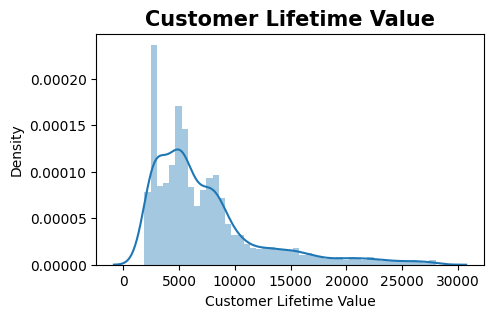

In [59]:
# Customer Lifetime Value - Overview
plt.figure(figsize=(5, 3))
sns.distplot(clv['Customer Lifetime Value'])
plt.title('Customer Lifetime Value', size=15, weight='bold');

#Explain AI

In [60]:
# Best Model : Random Forest tuned with hyperparameter
model_jagoan = random_rf.best_estimator_

model_jagoan['model']

RandomForestRegressor(max_depth=25, max_features=0.9, max_samples=0.8,
                      min_samples_leaf=4, min_samples_split=4, n_estimators=249,
                      random_state=1)

In [61]:
# Pipeline
model_jagoan

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Ordinal',
                                                  OrdinalEncoder(cols=['Coverage',
                                                                       'Education'],
                                                                 mapping=[{'col': 'Coverage',
                                                                           'data_type': dtype('O'),
                                                                           'mapping': Basic       0
Extended    1
Premium     2
dtype: int64},
                                                                          {'col': 'Education',
                                                                           'data_type': dtype('O'),
                                                                           'mapping': High School or Below    0
College                 1
Master                  2
Bachelor                3
Doctor                  4
dtype: int64}]),
                                                  ['Coverage', 'Education']),
                                                 ('Onehot',
                                                  OneHotEncoder(drop='first'),
                                                  ['Vehicle Class',
                                                   'Renew Offer Type',
                                                   'EmploymentStatus',
                                                   'Marital Status'])])),
                ('scaler', StandardScaler()),
                ('model',
                 RandomForestRegressor(max_depth=25, max_features=0.9,
                                       max_samples=0.8, min_samples_leaf=4,
                                       min_samples_split=4, n_estimators=249,
                                       random_state=1))])

##Nama Features

In [62]:
# Nama Column di Transformer
transformer.get_feature_names_out()

array(['Ordinal__Coverage', 'Ordinal__Education',
       'Onehot__Vehicle Class_Luxury Car',
       'Onehot__Vehicle Class_Luxury SUV', 'Onehot__Vehicle Class_SUV',
       'Onehot__Vehicle Class_Sports Car',
       'Onehot__Vehicle Class_Two-Door Car',
       'Onehot__Renew Offer Type_Offer2',
       'Onehot__Renew Offer Type_Offer3',
       'Onehot__Renew Offer Type_Offer4',
       'Onehot__EmploymentStatus_Employed',
       'Onehot__EmploymentStatus_Medical Leave',
       'Onehot__EmploymentStatus_Retired',
       'Onehot__EmploymentStatus_Unemployed',
       'Onehot__Marital Status_Married', 'Onehot__Marital Status_Single',
       'remainder__Number of Policies', 'remainder__Monthly Premium Auto',
       'remainder__Total Claim Amount', 'remainder__Income'], dtype=object)

In [63]:
# nama features
features = list(transformer.get_feature_names_out())

list_features = []

for feature in features:
    list_features.append('_'.join(feature.split('_')[2:]))

list_features

['Coverage',
 'Education',
 'Vehicle Class_Luxury Car',
 'Vehicle Class_Luxury SUV',
 'Vehicle Class_SUV',
 'Vehicle Class_Sports Car',
 'Vehicle Class_Two-Door Car',
 'Renew Offer Type_Offer2',
 'Renew Offer Type_Offer3',
 'Renew Offer Type_Offer4',
 'EmploymentStatus_Employed',
 'EmploymentStatus_Medical Leave',
 'EmploymentStatus_Retired',
 'EmploymentStatus_Unemployed',
 'Marital Status_Married',
 'Marital Status_Single',
 'Number of Policies',
 'Monthly Premium Auto',
 'Total Claim Amount',
 'Income']

##SHAP

**Import Library**

In [64]:
# Import Library SHAP
import shap

**SHAP Configuration and Calculation**

In [65]:
# SHAP Explainer Configuration
explainer = shap.Explainer(
    model_jagoan[-1].predict,
    model_jagoan[0].transform(X_test)
)

# SHAP Value Calculation
shap_values = explainer(model_jagoan[0].transform(X_test))

PermutationExplainer explainer: 988it [06:29,  2.49it/s]


**SHAP - Violin Plot Overview**

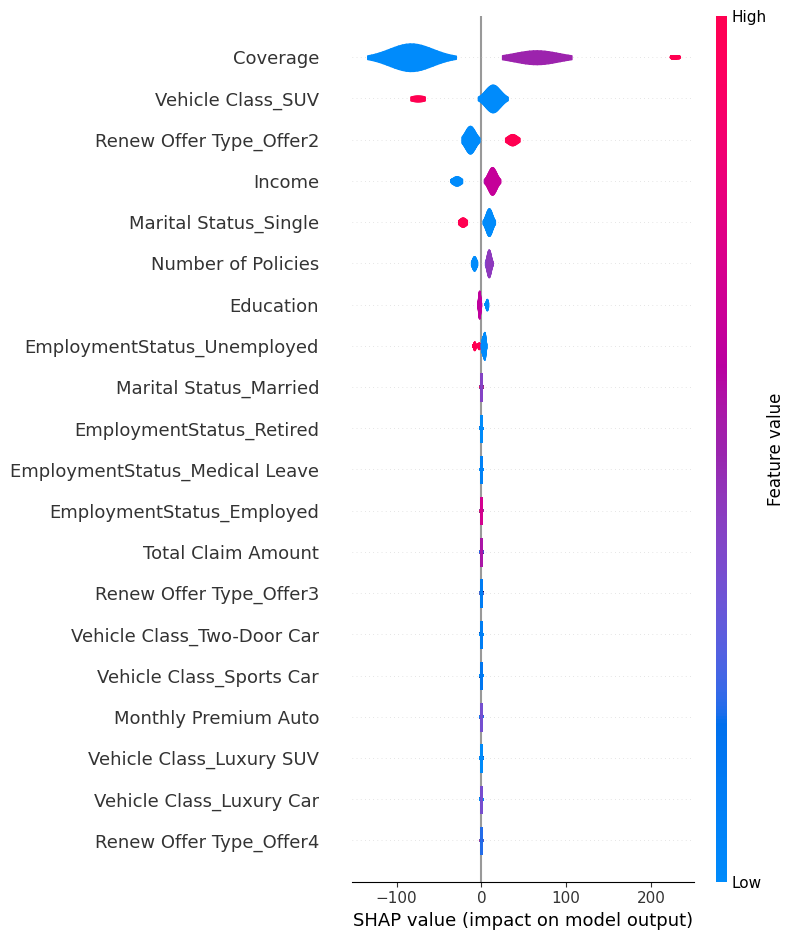

In [66]:
# SHAP : Violin Plot
shap.summary_plot(
    shap_values,
    feature_names = list_features,
    plot_type='violin',
    )

In [84]:
#nantidihapus
clv.columns

Index(['Vehicle Class', 'Coverage', 'Renew Offer Type', 'EmploymentStatus',
       'Marital Status', 'Education', 'Number of Policies',
       'Monthly Premium Auto', 'Total Claim Amount', 'Income',
       'Customer Lifetime Value'],
      dtype='object')

**Analisis Violin Plot berdasarkan SHAP Value**

1. Fitur `Coverage`
  - Fitur ini merupakan kontribusi paling dominan dalam menentukan besar atau kecilnya nilai CLV dibandingkan fitur lainnya.
  - Semakin tinggi jenis coverage yang dipilih customer (seperti Premium), semakin tinggi nilai CLV yang dihasilkan.
2. Fitur `Vehicle Class`
  - Customer dengan jenis mobil SUV cenderung mengurangi nilai CLV cukup signifikan dibandingkan dengan jenis mobil lainnya.
  - Jenis mobil selain SUV cenderung berkontribusi pada nilai CLV yang lebih tinggi.
3. Fitur `Renew Offer Type`
  - Renew offer dengan jenis penawaran Offer2 mengindikasikan potensi CLV yang lebih besar untuk perusahaan.
4. Fitur `Income`
  - Nilai income yang rendah pada customer mempengaruhi CLV yang lebih kecil bagi perusahaan.
5. Fitur `Marital Status`
  - Customer dengan status single cenderung mengurangi nilai clv menjadi lebih kecil, adapun status yang lainnya seperti Married maupun divorced cenderung memperbesar nilai clv.
6. Fitur `Number of Policies`
  - Customer dengan jumlah polis yang sedikit cenderung mengurangi nilai clv yang bisa didapatkan oleh perusahaan, dan berlaku sebaliknya.
7. Adapun fitur lainnya seperti `Monthly Premium Auto`, `EmploymentStatus`, `Education`, maupun `Total Claim Amount` tidak terlalu mempengaruhi nilai clv customer tersebut.

**Target Customer**

#Conclusion and Recomendation

**Conclusion**

Berdasarkan hasil analisis dan pemodelan yang telah dilakukan, terdapat beberapa kesimpulan sebagai berikut:
1. **Model Prediksi**
  >Prediksi Customer Lifetime Value (CLV) dilakukan menggunakan model Machine Learning Regresi dengan algoritma **Random Forest with Hyperparameter Tuning**.
2. **Metrik Evaluasi Model**
Keandalan model yang digunakan dapat dilihat dari **3 metrik** berikut:
  - MAE: 1.157 USD
  - RMSE: 2.665 USD
  - MAPE: 9,7%
3. **Limitasi model**
  >Model ini memiliki limitasi pada range CLV bernilai antara 1898 USD hingga 16600 USD. Namun, performa model yang bisa dipercaya keakuratannya tercapai pada range antara 1898 hingga 11500 USD. Sementara itu, untuk range 11500 USD hingga 16600 USD, hasil prediksi model masih kurang dapat dipercaya.
4. Fitur Penentu Terbesar
  >Fitur yang **berkontribusi signifikan** terhadap besar/kecilnya nilai CLV customer adalah fitur **Coverage**. Semakin tinggi tipe coverage yang diambil oleh customer, semakin besar peluang nilai CLV yang dihasilkan oleh customer tersebut..

**Recomendation**

Adapun rekomendasi yang sekiranya dapat dilakukan sebagai berikut:
1. **Strategi perusahaan**
  - Specific: Meningkatkan pemasaran produk dengan tipe Coverage Premium dan menawarkan Renew Contract menggunakan penawaran Offer2 kepada pelanggan dengan jenis mobil selain SUV, yang sudah menikah, dan memiliki kesadaran tinggi akan pentingnya asuransi (dilihat dari jumlah polis yang dipegang).
  - Achievable: Menawarkan diskon khusus dan meningkatkan layanan membership (misalnya, akses ke program loyalitas atau bonus) pada product dengan coverage Premium.
  - Achievable: Penawaran diskon dan peningkatan layanan membership  
  - Relevant: Berdasarkan analisis SHAP-value dari model prediksi sebelumnya, Coverage Premium dan Renew Contract Offer2 memiliki pengaruh signifikan terhadap peningkatan CLV yang didapatkan perusahaan.
  - Time-bound: Evaluasi efektivitas marketing dalam memilih Coverage Premium dengan offer2 setiap bulan, dan evaluasi peningkatan nilai CLV setelah satu tahun (menyesuaikan dengan periode kontrak asuransi mobil yang umumnya berdurasi 1 tahun).
2. **Upgrade model**
  >Jika perusahaan hendak meningkatkan akurasi model khususnya pada rentang nilai CLV 11500 hinga 16600 USD, solusi yang dapat dilakukan bisa dengan memaksimalkan penambahan data dan oversampling.

**Save Model**

In [68]:
# Save model
import pickle

pickle.dump(model_jagoan, open('Model_CLV_RandomForest.sav', 'wb'))